### Load dataset from Gdrive and unzip

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/FYP2/Brownspot.zip", 'r')
zip_ref.extractall("/content/dataset")
zip_ref.close()

### Split dataset into train, val

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Set the path to your dataset directory
dataset_path = '/content/dataset'

# Set the path to the new train/val directory
train_val_path = '/content/dataset'

# Create train/val directories if they don't exist
os.makedirs(os.path.join(train_val_path, 'train'), exist_ok=True)
os.makedirs(os.path.join(train_val_path, 'val'), exist_ok=True)

# List the classes in your dataset
classes = ['Bacterialblight', 'Brownspot', 'Blast']

# Loop through each class
for class_name in classes:
    # Create train/val directories for each class
    os.makedirs(os.path.join(train_val_path, 'train', class_name), exist_ok=True)
    os.makedirs(os.path.join(train_val_path, 'val', class_name), exist_ok=True)

    # Get the list of image files for the current class
    class_path = os.path.join(dataset_path, class_name)
    files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

    # Split the files into train and val sets
    train_files, val_files = train_test_split(files, test_size=0.2, random_state=42)

    # Move the files to the corresponding train and val directories
    for file in train_files:
        src_path = os.path.join(class_path, file)
        dest_path = os.path.join(train_val_path, 'train', class_name, file)
        shutil.copy(src_path, dest_path)

    for file in val_files:
        src_path = os.path.join(class_path, file)
        dest_path = os.path.join(train_val_path, 'val', class_name, file)
        shutil.copy(src_path, dest_path)

print("Dataset split into train and val successfully.")


Dataset split into train and val successfully.


In [ ]:
# Print the number of items in each folder
for class_name in classes:
  train_count = len(os.listdir(os.path.join(train_val_path, 'train', class_name)))
  val_count = len(os.listdir(os.path.join(train_val_path, 'val', class_name)))

  print(f"Class: {class_name}, Train items: {train_count}, Val items: {val_count}")


Class: Bacterialblight, Train items: 288, Val items: 72
Class: Brownspot, Train items: 288, Val items: 72
Class: Blast, Train items: 288, Val items: 72


### Install yolo dependencies, and start training

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.2/699.2 kB 4.6 MB/s eta 0:00:00


In [ ]:
import os

from ultralytics import YOLO


# Load a model
model = YOLO("yolov8n-cls.pt")  # load a pretained model

# Use the model
DATA_DIR = "/content/dataset"
results = model.train(data=DATA_DIR, epochs=50, imgsz=64)  # train the model


100%|██████████| 5.30M/5.30M [00:00<00:00, 66.1MB/s]


Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/dataset, epochs=50, time=None, patience=50, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True

train: Scanning /content/dataset/train... 864 images, 0 corrupt: 100%|██████████| 864/864 [00:00<00:00, 2266.00it/s]

train: New cache created: /content/dataset/train.cache



val: Scanning /content/dataset/val... 216 images, 0 corrupt: 100%|██████████| 216/216 [00:00<00:00, 3493.29it/s]

val: New cache created: /content/dataset/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
50 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/50         0G      1.226         16         64:   7%|▋         | 4/54 [00:01<00:12,  4.12it/s]

       1/50         0G      1.189         16         64:  17%|█▋        | 9/54 [00:02<00:09,  4.94it/s]
100%|██████████| 755k/755k [00:00<00:00, 13.8MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  4.81it/s]

                   all      0.634          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  7.25it/s]

                   all      0.838          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  5.86it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  7.39it/s]

                   all      0.894          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  4.78it/s]

                   all       0.94          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  6.93it/s]

                   all      0.949          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  7.35it/s]

                   all      0.926          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  5.47it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  5.83it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


      10/50         0G     0.2732         16         64: 100%|██████████| 54/54 [00:10<00:00,  5.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  7.31it/s]

                   all      0.954          1



      Epoch    GPU_mem       loss  Instances       Size


      11/50         0G     0.2199         16         64: 100%|██████████| 54/54 [00:10<00:00,  5.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  7.28it/s]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      12/50         0G     0.2233         16         64: 100%|██████████| 54/54 [00:09<00:00,  5.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  4.62it/s]

                   all      0.949          1



      Epoch    GPU_mem       loss  Instances       Size


      13/50         0G     0.2162         16         64: 100%|██████████| 54/54 [00:09<00:00,  5.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  7.34it/s]

                   all      0.958          1



      Epoch    GPU_mem       loss  Instances       Size


      14/50         0G     0.2003         16         64: 100%|██████████| 54/54 [00:10<00:00,  5.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  7.39it/s]

                   all       0.94          1



      Epoch    GPU_mem       loss  Instances       Size


      15/50         0G     0.2056         16         64: 100%|██████████| 54/54 [00:10<00:00,  5.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  5.73it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


      16/50         0G     0.2195         16         64: 100%|██████████| 54/54 [00:08<00:00,  6.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  5.49it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


      17/50         0G     0.1577         16         64: 100%|██████████| 54/54 [00:10<00:00,  5.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  7.17it/s]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      18/50         0G     0.1511         16         64: 100%|██████████| 54/54 [00:10<00:00,  5.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  6.86it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      19/50         0G     0.1799         16         64: 100%|██████████| 54/54 [00:09<00:00,  5.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  4.75it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      20/50         0G     0.1399         16         64: 100%|██████████| 54/54 [00:09<00:00,  5.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  7.39it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


      21/50         0G     0.1442         16         64: 100%|██████████| 54/54 [00:10<00:00,  4.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  7.15it/s]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      22/50         0G     0.1241         16         64: 100%|██████████| 54/54 [00:10<00:00,  4.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  7.14it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      23/50         0G      0.136         16         64: 100%|██████████| 54/54 [00:09<00:00,  5.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  4.81it/s]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      24/50         0G     0.1345         16         64: 100%|██████████| 54/54 [00:09<00:00,  5.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  6.77it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


      25/50         0G     0.1414         16         64: 100%|██████████| 54/54 [00:10<00:00,  5.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  7.34it/s]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      26/50         0G     0.1357         16         64: 100%|██████████| 54/54 [00:10<00:00,  5.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  5.23it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      27/50         0G      0.107         16         64: 100%|██████████| 54/54 [00:09<00:00,  5.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  6.18it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


      28/50         0G      0.142         16         64: 100%|██████████| 54/54 [00:10<00:00,  5.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  7.25it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


      29/50         0G     0.1215         16         64: 100%|██████████| 54/54 [00:10<00:00,  5.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  7.25it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


      30/50         0G     0.1268         16         64: 100%|██████████| 54/54 [00:09<00:00,  5.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  4.62it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      31/50         0G     0.1023         16         64: 100%|██████████| 54/54 [00:09<00:00,  5.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  7.24it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


      32/50         0G     0.0976         16         64: 100%|██████████| 54/54 [00:10<00:00,  4.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  7.26it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      33/50         0G     0.1287         16         64: 100%|██████████| 54/54 [00:10<00:00,  4.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  7.29it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      34/50         0G     0.1202         16         64: 100%|██████████| 54/54 [00:08<00:00,  6.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  4.87it/s]

                   all      0.968          1



      Epoch    GPU_mem       loss  Instances       Size


      35/50         0G    0.09194         16         64: 100%|██████████| 54/54 [00:10<00:00,  5.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  7.36it/s]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      36/50         0G     0.1059         16         64: 100%|██████████| 54/54 [00:10<00:00,  5.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  6.99it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


      37/50         0G    0.08818         16         64: 100%|██████████| 54/54 [00:09<00:00,  5.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  4.87it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


      38/50         0G     0.1202         16         64: 100%|██████████| 54/54 [00:09<00:00,  5.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  7.29it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      39/50         0G    0.08133         16         64: 100%|██████████| 54/54 [00:10<00:00,  5.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  7.47it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      40/50         0G     0.1066         16         64: 100%|██████████| 54/54 [00:10<00:00,  5.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  7.30it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      41/50         0G    0.06996         16         64: 100%|██████████| 54/54 [00:15<00:00,  3.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      42/50         0G    0.09206         16         64: 100%|██████████| 54/54 [00:13<00:00,  4.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  5.99it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      43/50         0G     0.1068         16         64: 100%|██████████| 54/54 [00:09<00:00,  5.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  5.17it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      44/50         0G    0.07871         16         64: 100%|██████████| 54/54 [00:12<00:00,  4.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  7.43it/s]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      45/50         0G    0.08962         16         64: 100%|██████████| 54/54 [00:14<00:00,  3.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      46/50         0G    0.09583         16         64: 100%|██████████| 54/54 [00:14<00:00,  3.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  5.70it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      47/50         0G     0.1223         16         64: 100%|██████████| 54/54 [00:13<00:00,  4.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  7.23it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


      48/50         0G    0.09459         16         64: 100%|██████████| 54/54 [00:14<00:00,  3.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  7.44it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


      49/50         0G     0.1051         16         64: 100%|██████████| 54/54 [00:13<00:00,  4.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  7.44it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


      50/50         0G    0.07133         16         64: 100%|██████████| 54/54 [00:11<00:00,  4.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  7.31it/s]

                   all      0.981          1



50 epochs completed in 0.170 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs
train: /content/dataset/train... found 864 images in 3 classes ✅ 
val: /content/dataset/val... found 216 images in 3 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]


                   all      0.986          1
Speed: 0.0ms preprocess, 1.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


### Visualize the train/val loss and accuracy

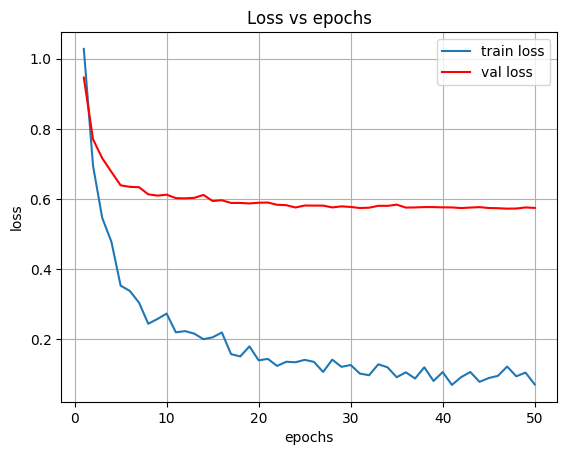

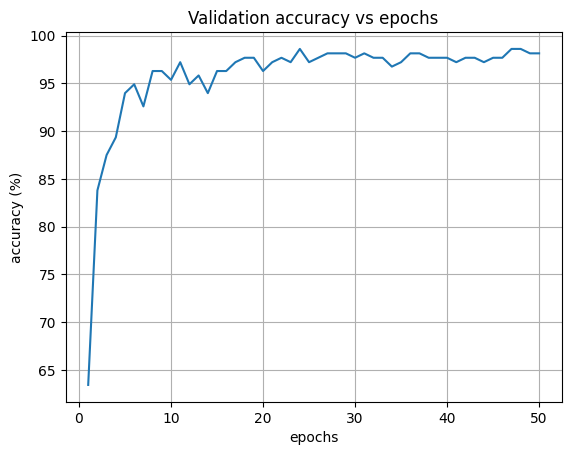

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt


results_path = '/content/runs/classify/train/results.csv'

results = pd.read_csv(results_path)

plt.figure()
plt.plot(results['                  epoch'], results['             train/loss'], label='train loss')
plt.plot(results['                  epoch'], results['               val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


plt.figure()
plt.plot(results['                  epoch'], results['  metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()

### Predict with test images

In [ ]:
pip install matplotlib pillow


In [ ]:
zip_ref = zipfile.ZipFile("/content/captured_images.zip", 'r')
zip_ref.extractall("/content/dataset")
zip_ref.close()

#then rename the 'captured_images' to 'test'


image 1/1 /content/dataset/test/Paddy6.PNG: 64x64 Brownspot 0.90, Blast 0.08, Bacterialblight 0.03, 11.1ms
Speed: 5.4ms preprocess, 11.1ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)


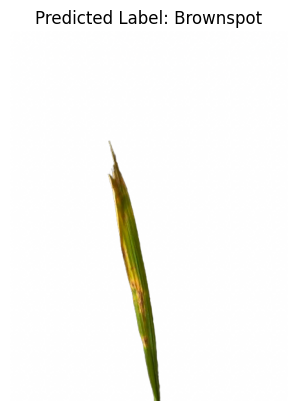


image 1/1 /content/dataset/test/Paddy3.PNG: 64x64 Brownspot 0.89, Bacterialblight 0.06, Blast 0.05, 6.5ms
Speed: 4.8ms preprocess, 6.5ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)


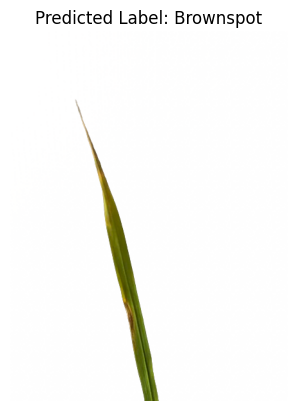


image 1/1 /content/dataset/test/Paddy10.jpg: 64x64 Bacterialblight 1.00, Brownspot 0.00, Blast 0.00, 9.6ms
Speed: 2.9ms preprocess, 9.6ms inference, 0.4ms postprocess per image at shape (1, 3, 64, 64)


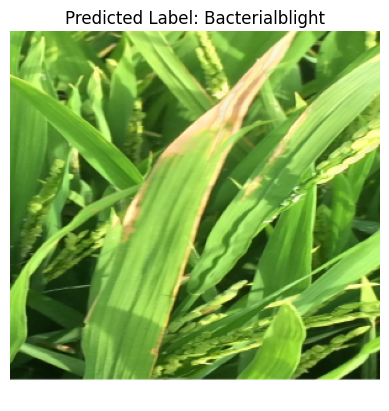


image 1/1 /content/dataset/test/Paddy9.jpg: 64x64 Bacterialblight 1.00, Blast 0.00, Brownspot 0.00, 7.3ms
Speed: 3.1ms preprocess, 7.3ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)


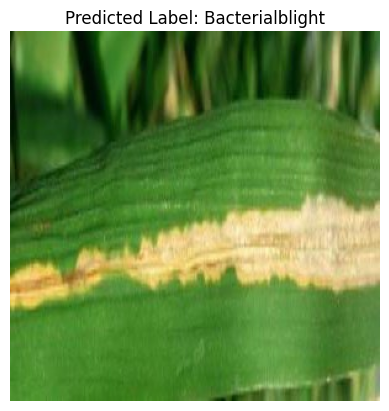


image 1/1 /content/dataset/test/Paddy5.PNG: 64x64 Brownspot 0.81, Blast 0.18, Bacterialblight 0.01, 32.7ms
Speed: 13.9ms preprocess, 32.7ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)


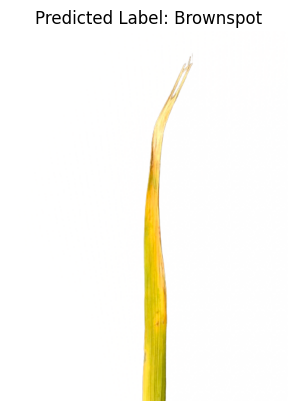


image 1/1 /content/dataset/test/Paddy11.jpg: 64x64 Brownspot 0.51, Bacterialblight 0.25, Blast 0.24, 19.2ms
Speed: 18.6ms preprocess, 19.2ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)


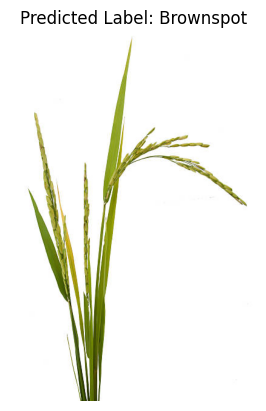


image 1/1 /content/dataset/test/Paddy1.PNG: 64x64 Brownspot 0.41, Blast 0.41, Bacterialblight 0.18, 8.3ms
Speed: 6.3ms preprocess, 8.3ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)


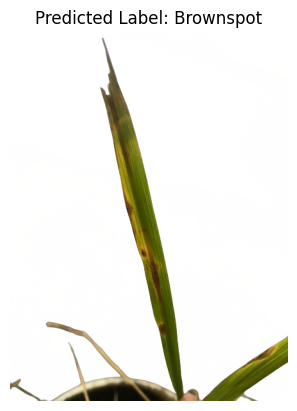


image 1/1 /content/dataset/test/Paddy4.PNG: 64x64 Blast 0.57, Brownspot 0.39, Bacterialblight 0.03, 9.3ms
Speed: 6.5ms preprocess, 9.3ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)


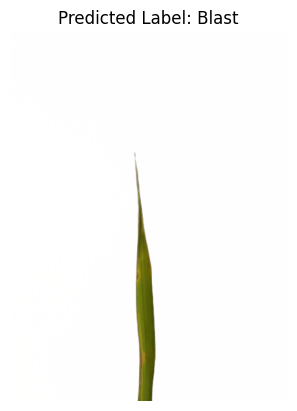


image 1/1 /content/dataset/test/Paddy8.jpg: 64x64 Blast 1.00, Brownspot 0.00, Bacterialblight 0.00, 7.0ms
Speed: 3.5ms preprocess, 7.0ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)


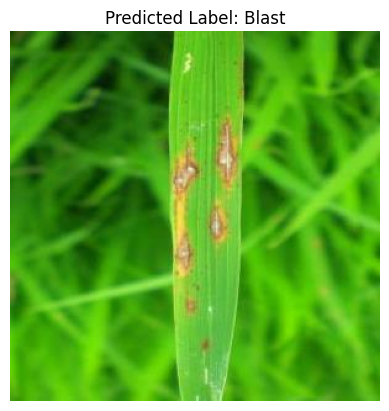


image 1/1 /content/dataset/test/Paddy2.PNG: 64x64 Brownspot 0.65, Blast 0.34, Bacterialblight 0.01, 6.8ms
Speed: 5.0ms preprocess, 6.8ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)


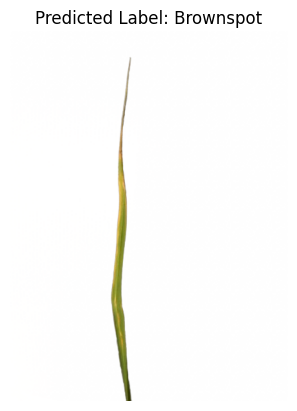


image 1/1 /content/dataset/test/Paddy7.jpg: 64x64 Brownspot 1.00, Bacterialblight 0.00, Blast 0.00, 8.3ms
Speed: 3.6ms preprocess, 8.3ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)


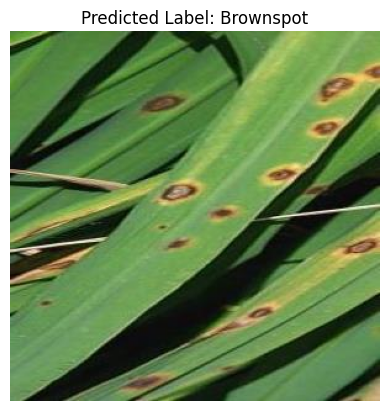

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

model = YOLO('/content/runs/classify/train/weights/best.pt')  # load a custom model

# Set the path to the 'test' folder
test_folder = '/content/dataset/test/'

# Iterate through all files in the 'test' folder
for filename in os.listdir(test_folder):
    if filename.endswith(".jpg") or filename.endswith(".PNG"):
        # Construct the full path to the image
        image_path = os.path.join(test_folder, filename)

        # Predict on the current image
        results = model(image_path)

        # Extract names and probabilities
        names_dict = results[0].names
        probs = results[0].probs.data.tolist()

        # Get the predicted class
        predicted_class = names_dict[np.argmax(probs)]

        # Display the image and the predicted label
        img = Image.open(image_path)
        plt.imshow(img)
        plt.title(f"Predicted Label: {predicted_class}")
        plt.axis('off')
        plt.show()